In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [76]:
# GDP dataset
gdp = pd.read_csv('GDP.csv')

# Happiness dataset
happiness = pd.read_csv('Happiness.csv')

In [77]:
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [78]:
gdp.head()

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,NaN
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,NaN
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,NaN
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,NaN


In [79]:
hapCountries = [x for x in happiness['Country']]
gdpCountries = [x for x in gdp['Country ']]

hapCountries.sort()

print('Countries in Happiness dataset but not in GDP dataset:')
for country in hapCountries:
    if country not in gdpCountries:
        print(country)

print('\n\n')
print('Countries in GDP dataset but not in Happiness dataset:')
for country in gdpCountries:
    if country not in hapCountries:
        print(country)

Countries in Happiness dataset but not in GDP dataset:
Congo (Brazzaville)
Congo (Kinshasa)
Egypt
Hong Kong
Iran
Ivory Coast
Kyrgyzstan
Laos
Macedonia
North Cyprus
Palestinian Territories
Russia
Slovakia
Somaliland region
South Korea
Swaziland
Syria
Taiwan
Venezuela
Yemen



Countries in GDP dataset but not in Happiness dataset:
Aruba
Arab World
Antigua and Barbuda
Bahamas, The
Belize
Bermuda
Barbados
Brunei Darussalam
Central Europe and the Baltics
Cote d'Ivoire
Congo, Dem. Rep.
Congo, Rep.
Cabo Verde
Caribbean small states
Curacao
Cayman Islands
Dominica
East Asia & Pacific (excluding high income)
Early-demographic dividend
East Asia & Pacific
Europe & Central Asia (excluding high income)
Europe & Central Asia
Egypt, Arab Rep.
Euro area
Eritrea
European Union
Fragile and conflict affected situations
Fiji
Faroe Islands
Micronesia, Fed. Sts.
Gibraltar
Gambia, The
Guinea-Bissau
Equatorial Guinea
Grenada
Greenland
Guam
Guyana
High income
Hong Kong SAR, China
Heavily indebted poor countri

In [80]:
# All countries in the happiness dataset
hapCountries = [x for x in happiness['Country']]
# All countries (and regions) in the GDP dataset
gdpCountries = [x for x in gdp['Country ']]
# Country names the happiness dataset that have corresponding 
# countries in the GDP dataset but with different names
nameInHap = [
    'Congo (Brazzaville)',
    'Congo (Kinshasa)',
    'Egypt',
    'Hong Kong',
    'Iran',
    'Ivory Coast',
    'Kyrgyzstan',
    'Laos',
    'Macedonia',
    'Russia',
    'Slovakia',
    'Somaliland region',
    'South Korea',
    'Swaziland',
    'Syria',
    'Venezuela',
    'Yemen',
]
# Country names the GDP dataset that have corresponding 
# countries in the happiness dataset but with different names
nameInGDP = [
    "Congo, Rep.",
    "Congo, Dem. Rep.",
    "Egypt, Arab Rep.",
    "Hong Kong SAR, China",
    "Iran, Islamic Rep.",
    "Cote d'Ivoire",
    "Kyrgyz Republic",
    "Lao PDR",
    "North Macedonia",
    "Russian Federation",
    "Slovak Republic",
    "Somalia",
    "Korea, Rep.",
    "Eswatini",
    "Syrian Arab Republic",
    "Venezuela, RB",
    "Yemen, Rep.",
]
# This dictionary will contain the associated names
# in the format {happinessName : gdpName}
correspCountries = {}

# Initialize the correspCountries dictionary
for i in range(len(nameInHap)):
    correspCountries[nameInHap[i]] = nameInGDP[i]

# DataFrame of data to be analyzed
data = pd.DataFrame()

# Add country names to data DataFrame
# (Excluding North Cyprus, Palestinian Territories and Taiwan because not in gdpCountries)
# (Also excluding Venezuela, Djibouti, Syria, and Somaliland Region because no GDP data for 2015)
countries = [x for x in happiness['Country'] if x != 'North Cyprus' and x != 'Palestinian Territories' and x != 'Taiwan' and x != 'Venezuela' and x != 'Djibouti' and x != 'Syria' and x != 'Somaliland region']
data['Country'] = pd.Series(countries)

# Add happiness scores to data DataFrame
scores = [happiness['Happiness Score'][i] for i in range(len(happiness['Happiness Score'])) if happiness['Country'][i] in countries]
data['Score'] = pd.Series(scores)

# Dictionary of a country's GDP in the format {country : GDP}
gdpData = {}
for i in range(len(gdp)):
    gdpData[gdp['Country '][i]] = gdp['2015'][i]
    
# gdps is the actual GDP data that will be added to the data DataFrame
gdps = []
for country in data['Country']:
    if country not in correspCountries:
        gdps.append(gdpData[country])
    else:
        gdps.append(gdpData[correspCountries[country]])

# Add GDP values to data DataFrame
data['GDP'] = pd.Series(gdps)

for i in range(len(data['Country'])):
    print(data.iloc[[i]], '\n')

data

       Country  Score          GDP
0  Switzerland  7.587  63938.98939 

   Country  Score          GDP
1  Iceland  7.561  48728.09936 

   Country  Score          GDP
2  Denmark  7.527  49058.50107 

  Country  Score          GDP
3  Norway  7.522  60385.11676 

  Country  Score          GDP
4  Canada  7.427  44567.86635 

   Country  Score          GDP
5  Finland  7.406  42535.47517 

       Country  Score          GDP
6  Netherlands  7.378  50302.06775 

  Country  Score          GDP
7  Sweden  7.364  48975.00451 

       Country  Score          GDP
8  New Zealand  7.286  37475.17836 

     Country  Score          GDP
9  Australia  7.284  46276.15069 

   Country  Score          GDP
10  Israel  7.278  35436.81087 

       Country  Score          GDP
11  Costa Rica  7.226  15610.87955 

    Country  Score          GDP
12  Austria    7.2  49879.26647 

   Country  Score          GDP
13  Mexico  7.187  18284.88284 

          Country  Score          GDP
14  United States  7.119  56803.47

,Country,Score,GDP
0,Switzerland,7.587,63938.989390
1,Iceland,7.561,48728.099360
2,Denmark,7.527,49058.501070
3,Norway,7.522,60385.116760
4,Canada,7.427,44567.866350
...,...,...,...
146,Afghanistan,3.575,1886.692977
147,Rwanda,3.465,1890.203675
148,Benin,3.340,2122.235592
149,Burundi,2.905,764.195763


Mean GDP:		 20447.295885311923
Min GDP:		 744.7345426
Max GDP:		 123822.0833

Mean happiness score:	 5.386860927152318
Min happiness score:	 2.839
Max happiness score:	 7.587


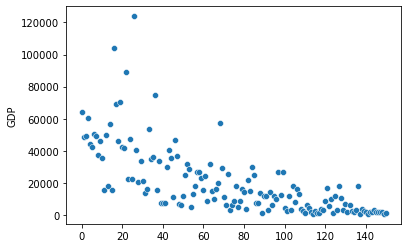

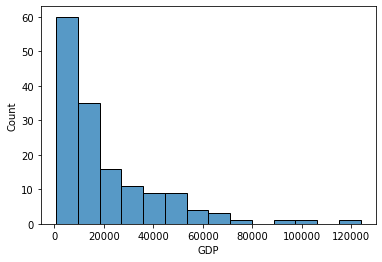

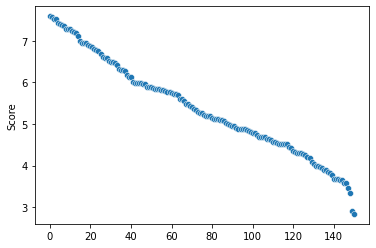

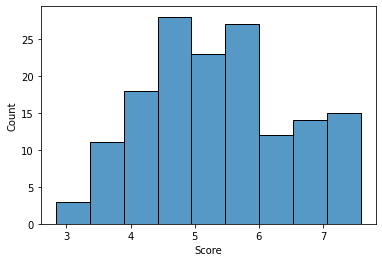

In [185]:
# Descriptive statistics
meanGDP = sum(data['GDP'])/len(data['GDP'])
meanHap = sum(data['Score'])/len(data['Score'])

print('Mean GDP:\t\t', meanGDP)
print('Min GDP:\t\t', min(data['GDP']))
print('Max GDP:\t\t', max(data['GDP']))
print()
print('Mean happiness score:\t', meanHap)
print('Min happiness score:\t', min(data['Score']))
print('Max happiness score:\t', max(data['Score']))

# Plots of data
sns.scatterplot(x = [x for x in range(len(data['Country']))], y = data['GDP'])
plt.show()
sns.histplot(data['GDP'])
plt.show()
sns.scatterplot(x = [x for x in range(len(data['Country']))], y = data['Score'])
plt.show()
sns.histplot(data['Score'])
plt.show()

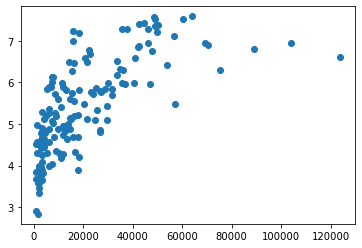

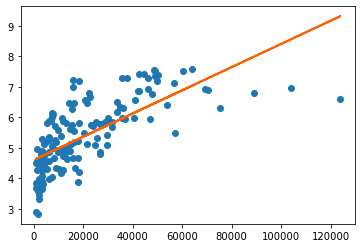

Coefficient of Determination (r squared):	 0.5012971809756932
Linear Correlation Coefficient (r)		 0.7080234325046687


In [82]:
# Creat a model?

from sklearn.linear_model import LinearRegression

# Set up data for regression model
x = np.array([x for x in data['GDP']]).reshape(-1, 1)
y = np.array([y for y in data['Score']])

# Create Linear Regression Model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Find r and r squared
r_squared = model.score(x, y)
r = math.sqrt(r_squared)

# Plot data and line of best fit
plt.scatter(x, y)
plt.show()
plt.scatter(x, y)
plt.plot(x, y_pred, color='#FF6000', linewidth='2')
plt.show()

print('Coefficient of Determination (r squared):\t', r_squared)
print('Linear Correlation Coefficient (r)\t\t', r)

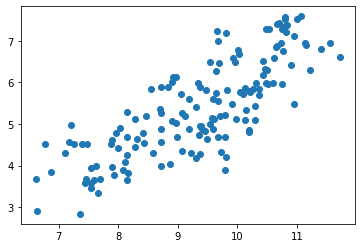

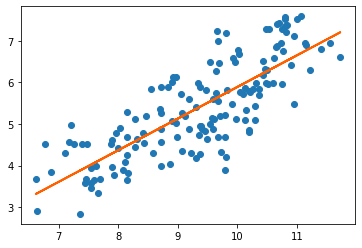

Coefficient of Determination (r squared):	 0.6339342399478253
Linear Correlation Coefficient (r):		 0.7961998743706414
Slope:	 [0.75930321]
y-intercept:	 -1.7040590896938586


In [164]:
# Create a model

from sklearn.linear_model import LinearRegression

# Set up data for regression model WITH transformation of independent variable
x = np.array([math.log(x) for x in data['GDP']]).reshape(-1, 1)
y = np.array([y for y in data['Score']])

# Create Linear Regression Model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Find r and r squared
r_squared = model.score(x, y)
r = math.sqrt(r_squared)

# Plot data and line of best fit
plt.scatter(x, y)
plt.show()
plt.scatter(x, y)
plt.plot(x, y_pred, color='#FF6000', linewidth='2')
plt.show()

print('Coefficient of Determination (r squared):\t', r_squared)
print('Linear Correlation Coefficient (r):\t\t', r)
print('Slope:\t', model.coef_)
print('y-intercept:\t', model.intercept_)

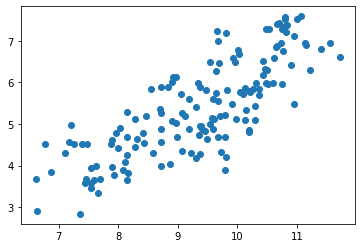

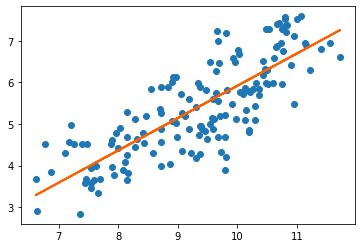

Coefficient of Determination (r squared):	 0.6334073620740717
Linear Correlation Coefficient (r):		 0.7958689352362434


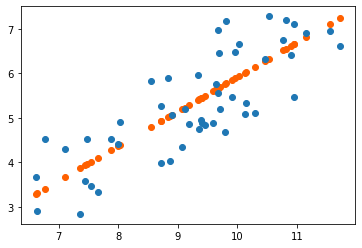

Sum of squared differences:  24.360390926130858


In [161]:
# Evaluate a model

from sklearn.linear_model import LinearRegression
import random

trainIndexes = []
MAX = len(data['Country'])
i = 0
while i <= 100:
    rand = random.randint(0, MAX-1)
    if rand in trainIndexes:
        i -= 1
    else:
        trainIndexes.append(rand)
    i += 1

testIndexes = [x for x in range(len(data['Country'])) if x not in trainIndexes]

# Set up train and test data for regression model
train_x = np.array([math.log(data['GDP'][i]) for i in trainIndexes]).reshape(-1, 1)
train_y = np.array([data['Score'][i] for i in trainIndexes])
test_x = np.array([math.log(data['GDP'][i]) for i in testIndexes]).reshape(-1, 1)
test_y = np.array([data['Score'][i] for i in testIndexes])

# Create trained Linear Regression Model
model = LinearRegression()
model.fit(train_x, train_y)
train_y_pred = model.predict(x)

# Plot data and line of best fit
plt.scatter(x, y)
plt.show()
plt.scatter(x, y)
plt.plot(x, train_y_pred, color='#FF6000', linewidth='2')
plt.show()

# Find r and r squared
r_squared = model.score(x, y)
r = math.sqrt(r_squared)

print('Coefficient of Determination (r squared):\t', r_squared)
print('Linear Correlation Coefficient (r):\t\t', r)

# Calculate error using test data
e = 0
test_y_pred = model.predict(test_x)
actual_y = []
for i in range(len(test_y_pred)):
    e += (data['Score'][testIndexes[i]] - test_y_pred[i])**2
    actual_y.append(data['Score'][testIndexes[i]])

plt.scatter(test_x, test_y_pred, color = '#FF6000')
plt.scatter(test_x, actual_y)
plt.show()
print('Sum of squared differences: ', e)

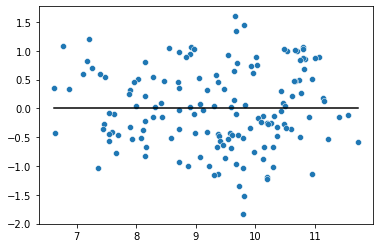

In [214]:
# Assumptions for hypothesis test satisfied?
#     --> Residual plot
#     --> Normal probability plot [Minitab]

logGDP = [math.log(x) for x in data['GDP']]
residuals = []
for i in range(len(y_pred)):
    residuals.append(data['Score'][i] - y_pred[i])
#     print(residuals[i])

sns.scatterplot(x = logGDP, y = residuals)
sns.lineplot(x = logGDP, y = 0, color = '#000000')
plt.show()

In [216]:
# Hypothesis Test (slope of regression line)

logGDP = [math.log(x) for x in data['GDP']]
x_bar = sum(logGDP) / len(logGDP)
y_bar = sum(data['Score']) / len(data['Score'])

# Initialize values needed for inference
SSE = 0
for i in range(len(y_pred)):
    SSE += (data['Score'][i] - y_pred[i])**2
Sxx = 0
Sxy = 0
Syy = 0
se = math.sqrt(SSE/(len(data['Score']) - 2))
for i in range(len(logGDP)):
    Sxx += (logGDP[i] - x_bar)**2
    Sxy += (logGDP[i] - x_bar) * (data['Score'][i] - y_bar)
    Syy += (data['Score'][i] - y_bar)**2
b1 = Sxy / Sxx

# Inference
#     Null Hypothesis: The predictor variable is NOT useful for making predictions
#     Alternative Hypothesis: The predictor variable IS useful for making predictions

# Significance level:
#     a = 0.05

# Test statistic
t = (b1 - 0) / (se / math.sqrt(Sxx))
print('t =', t)
# t = 16.063333807355594

# Rejection region approach:
#     Reject if t > t (a, n - 2) = t (0.05, 149) = 1.65514 [Minitab]

# p-value approach:
#     Reject if p < 0.05
#     P(X >= x) = 1 - P(X <= x) = 1 - P(X <= 16.063333807355594) = 1 - 1 = 0 [Minitab]

# Since t = 16.063333807355594 > t (0.05, 149) = 1.65514, or alternatively p = 0 < a = 0.05, 
# we reject the null hypothesis in favour of the alternative.

# At the 5% significance level, we conclude that the predictor variable is in fact useful for making predictions.

t = 16.063333807355594


In [84]:
# What about the extent to which GDP affects happiness scores?

meanGDPcontib = sum(happiness['Economy (GDP per Capita)'])/len(happiness['Economy (GDP per Capita)'])
print('Mean contribution of GDP to happiness score:\t', meanGDPcontib)
print('Minimum contribution:\t\t\t\t', min(happiness['Economy (GDP per Capita)']))
print('Maximum contribution:\t\t\t\t', max(happiness['Economy (GDP per Capita)']))

Mean contribution of GDP to happiness score:	 0.8461372151898726
Minimum contribution:				 0.0
Maximum contribution:				 1.69042


In [85]:
# Other factors contributing to happiness scores

meanFamcontib = sum(happiness['Family'])/len(happiness['Family'])
print('Mean contribution of family to happiness score:\t', meanFamcontib)
print('Minimum contribution:\t\t\t\t', min(happiness['Family']))
print('Maximum contribution:\t\t\t\t', max(happiness['Family']))

print()

meanHealcontib = sum(happiness['Health (Life Expectancy)'])/len(happiness['Health (Life Expectancy)'])
print('Mean contribution of life expectancy to happiness score:\t', meanHealcontib)
print('Minimum contribution:\t\t\t\t\t\t', min(happiness['Health (Life Expectancy)']))
print('Maximum contribution:\t\t\t\t\t\t', max(happiness['Health (Life Expectancy)']))

Mean contribution of family to happiness score:	 0.9910459493670887
Minimum contribution:				 0.0
Maximum contribution:				 1.40223

Mean contribution of life expectancy to happiness score:	 0.6302593670886079
Minimum contribution:						 0.0
Maximum contribution:						 1.02525


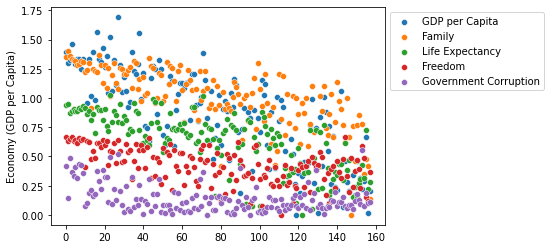

In [86]:
# Comparing contributions to happiness score

x_var = [x for x in range(len(happiness['Country']))]

sns.scatterplot(x = x_var, y = happiness['Economy (GDP per Capita)'])
sns.scatterplot(x = x_var, y = happiness['Family'])
sns.scatterplot(x = x_var, y = happiness['Health (Life Expectancy)'])
sns.scatterplot(x = x_var, y = happiness['Freedom'])
sns.scatterplot(x = x_var, y = happiness['Trust (Government Corruption)'])
plt.legend(labels = ['GDP per Capita', 'Family', 'Life Expectancy', 
                     'Freedom', 'Government Corruption'], 
                     bbox_to_anchor = (1, 1))